# 9th Winter Seminar Series (WSS)

![Image Title](https://wss-sharif.com/source/wss_footer.svg)

# 🤗 HuggingFace Tutorial - LLM Workshop - Session 3

Arash Marioriayd - Feb 2024

## Introduction

This notebook is a tutorial on how to use the HuggingFace 🤗 Transformers library to do NLP research. It is meant to be a quick overview of the main functionalities of the library. For more details about the library, you can refer to the [documentation](https://huggingface.co/transformers/index.html) and is based on the [Huggingface NLP Course](https://huggingface.co/learn/nlp-course/).

Checkout billions and billions of examples at https://huggingface.co/docs/transformers/notebooks

## Preliminaries

### Attention Mechanism

![Image Title](https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Attention-qkv.png/1400px-Attention-qkv.png)

### Common Transformer Architectures

Huggingface supports three types of transformer architectures: encoder-only, decoder-only, and encoder-decoder:

**Encoder Only**

<img src="https://camo.githubusercontent.com/0cf338091c252248d325e22b9a7804983855dfd141f3146d3e727d04ba2b99b4/68747470733a2f2f692e696d6775722e636f6d2f776e45525076712e706e67" width="400">

**Decoder Only**

<img src="https://camo.githubusercontent.com/fb067c10a4a22090fc1518a76cdc274b7f5571629a0b6a639bff9ade52b8468b/68747470733a2f2f692e696d6775722e636f6d2f793866683363722e706e67" width="400">

**Encoder-Decoder**

<img src="https://camo.githubusercontent.com/38b85c7db944daead510a50db42070e39a229fe33afc61e1f45a1f5e7c2ddcbe/68747470733a2f2f692e696d6775722e636f6d2f5937564b596d452e706e67" width="800">

### Model Zoo


![Image Title](https://abiaryan.com/assets/intro-llms/main.png)

Huggingface ecosystem consists of three main libraries: transformers, datasets, and tokenizers. The transformers library is the core library for using, training and fine-tuning transformer models. The datasets library provides access to a variety of public datasets as well as the ability to load your own data in a variety of formats. The tokenizers library provides an easy-to-use, fast and framework agnostic tokenizers.

![Image Title](https://camo.githubusercontent.com/0a3f6ef829b1f7424a6768e8d837bb4d2e4ade84ba1fd401c1f0575711c2394a/68747470733a2f2f692e696d6775722e636f6d2f777346423077702e706e67)

## Install Dependencies

In [1]:
! pip install transformers datasets tokenizers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00


In [2]:
import transformers

print(transformers.__version__)

4.37.2


Set the hugingface environment variables to change where models and data are downloaded.


In [3]:
import os
from pathlib import Path

hf_home = Path.home() / "scratch" / "hf_home"
hf_home.mkdir(parents=True, exist_ok=True)
os.environ["HF_HOME"] = str(hf_home)

print(os.environ["HF_HOME"])

/root/scratch/hf_home


## Super Easy To Use

When creating a pipeline object, the model is downloaded and cached. If the command is rerun, the cached model is used without needing to download it again. When passing text to the pipeline, there are three steps: preprocessing the text, passing it to the model, and post-processing the model's predictions for better understanding.

learn more about [pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines)

In [4]:
# Text Generation Pipeline

from transformers import pipeline

generator = pipeline(task="text-generation", model="facebook/opt-125m")
generator("In this NLP course, we will teach you how to")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/251M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

[{'generated_text': 'In this NLP course, we will teach you how to use the NLP toolkit to create'}]

In [ ]:
# Fill Mask Pipeline

from transformers import pipeline

unmasker = pipeline(task="fill-mask", model="roberta-base")
unmasker("This course will teach you all about <mask> models.", top_k=2)

[{'score': 0.07767865061759949,
  'token': 5,
  'token_str': ' the',
  'sequence': 'This course will teach you all about the models.'},
 {'score': 0.05484820529818535,
  'token': 209,
  'token_str': ' these',
  'sequence': 'This course will teach you all about these models.'}]

In [ ]:
# Text Classification

from transformers import pipeline

pipe = pipeline(task="text-classification")
pipe(["This restaurant is awesome", "This restaurant is awful"])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998743534088135},
 {'label': 'NEGATIVE', 'score': 0.9996669292449951}]

In [ ]:
# Sentiment Analysis

from transformers import pipeline

classifier = pipeline(task='sentiment-analysis', model="finiteautomata/bertweet-base-sentiment-analysis")
classifier("I am very happy.")

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'POS', 'score': 0.9925040006637573}]

In [ ]:
# Translation

from transformers import pipeline

translator = pipeline(task="translation", model="persiannlp/mt5-small-parsinlu-translation_en_fa")
translator("How old are you?")

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1133: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'translation_text': 'چند سالته؟'}]

In [ ]:
# Summarization

from transformers import pipeline

summarizer = pipeline(task="summarization")
summarizer("Attention mechanisms enhance deep learning models by selectively focusing on important input elements, improving prediction accuracy and computational efficiency. They prioritize and emphasize relevant information, acting as a spotlight to enhance overall model performance.",
           max_length=20)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your min_length=56 must be inferior than your max_length=20.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1158: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (20). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


[{'summary_text': ' Attention mechanisms enhance deep learning models by selectively focusing on important input elements . They prioritize and'}]

In [ ]:
# Question Answering

from transformers import pipeline

question_answering_model = pipeline(task="question-answering", model="deepset/roberta-base-squad2")
question_answering_model(question="Where do I live?", context="My name is Arash, I am 25, and I live in Tehran")

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

{'score': 0.9694591164588928, 'start': 41, 'end': 47, 'answer': 'Tehran'}

In [ ]:
# Conversational

from transformers import pipeline, Conversation

chatbot = pipeline(task="conversational", model="facebook/blenderbot-400M-distill")

conversation = Conversation("I'm looking for a movie. what's your favourite one?")
output = chatbot(conversation).messages[-1]["content"]
print(output)

conversation.add_message({"role": "user", "content": "That's interesting. Thanks"})
output = chatbot(conversation).messages[-1]["content"]
print(output)

 I don't really have a favorite. I like all kinds of movies. What kind of movie are you looking for?
 You're welcome. I hope you find something you like. What do you like to do for fun?


## Building the pipeline from scratch: Fill Mask

In this section, we will perform the Fill Mask task by only using the building blocks of the pipeline. Here is a overview of the steps:

<img src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/full_nlp_pipeline.svg" alt="transformer_pipeline_overview.png" width="800"/>

### Dataset

In [5]:
from datasets import load_dataset

dataset = load_dataset("imdb")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [ ]:
print(len(dataset["train"]))
print(dataset["train"][3])

25000
{'text': "This film was probably inspired by Godard's Masculin, féminin and I urge you to see that film instead.<br /><br />The film has two strong elements and those are, (1) the realistic acting (2) the impressive, undeservedly good, photo. Apart from that, what strikes me most is the endless stream of silliness. Lena Nyman has to be most annoying actress in the world. She acts so stupid and with all the nudity in this film,...it's unattractive. Comparing to Godard's film, intellectuality has been replaced with stupidity. Without going too far on this subject, I would say that follows from the difference in ideals between the French and the Swedish society.<br /><br />A movie of its time, and place. 2/10.", 'label': 0}


### Tokenizer

In [7]:
from transformers import AutoTokenizer

checkpoint = "roberta-base" # ["roberta-large", "gpt2", "gpt2-large", etc]
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenizer

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

Formated output
```
RobertaTokenizerFast(
    name_or_path='roberta-base',
    vocab_size=50265,
    model_max_length=512,
    is_fast=True,
    padding_side='right',
    truncation_side='right',
    special_tokens={
        'bos_token': '<s>',
        'eos_token': '</s>',
        'unk_token': '<unk>',
        'sep_token': '</s>',
        'pad_token': '<pad>',
        'cls_token': '<s>',
        'mask_token': AddedToken(
            "<mask>",
            rstrip=False,
            lstrip=True,
            single_word=False,
            normalized=False
        )
    },
    clean_up_tokenization_spaces=True
)
```

In [ ]:
# Same as:

from transformers import RobertaTokenizer

RobertaTokenizer.from_pretrained(checkpoint)

RobertaTokenizer(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [8]:
raw_inputs = [
    "This course will teach you all about <mask> models.",
    "I <mask> this so much!",
]

inputs = tokenizer(
    raw_inputs,
    padding=True,
    truncation=True,
    return_tensors="pt",
    add_special_tokens=True,
)

In [9]:
inputs.keys()

dict_keys(['input_ids', 'attention_mask'])

In [ ]:
inputs["input_ids"], inputs["input_ids"].shape

(tensor([[    0,   713,   768,    40,  6396,    47,    70,    59, 50264,  3092,
              4,     2],
         [    0,   100, 50264,    42,    98,   203,   328,     2,     1,     1,
              1,     1]]),
 torch.Size([2, 12]))

In [ ]:
inputs["attention_mask"], inputs["attention_mask"].shape

(tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]]),
 torch.Size([2, 12]))

In [ ]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]) # or inputs.tokens(batch_index=0)

['<s>',
 'This',
 'Ġcourse',
 'Ġwill',
 'Ġteach',
 'Ġyou',
 'Ġall',
 'Ġabout',
 '<mask>',
 'Ġmodels',
 '.',
 '</s>']

In [10]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"][1])

['<s>',
 'I',
 '<mask>',
 'Ġthis',
 'Ġso',
 'Ġmuch',
 '!',
 '</s>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>']

In [ ]:
tokenizer.decode(inputs["input_ids"][0])

'<s>This course will teach you all about<mask> models.</s>'

In [ ]:
inputs.word_ids(batch_index=0)

[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, None]

In [ ]:
tokenizer.decode(inputs["input_ids"][0], skip_special_tokens=True)

'This course will teach you all about models.'

In [ ]:
tokenizer.tokenize(raw_inputs[0])

['This',
 'Ġcourse',
 'Ġwill',
 'Ġteach',
 'Ġyou',
 'Ġall',
 'Ġabout',
 ' <mask>',
 'Ġmodels',
 '.']

In [ ]:
seq = "Hello World"
tokenizer.tokenize(seq), tokenizer(seq, add_special_tokens=False).input_ids

(['Hello', 'ĠWorld'], [31414, 623])

In [ ]:
seq = " Hello World"
tokenizer.tokenize(seq), tokenizer(seq, add_special_tokens=False).input_ids

(['ĠHello', 'ĠWorld'], [20920, 623])

In [ ]:
seq = ".Hello World"
tokenizer.tokenize(seq), tokenizer(seq, add_special_tokens=False).input_ids

(['.', 'Hello', 'ĠWorld'], [4, 31414, 623])

In [ ]:
seq = ". Hello World"
tokenizer.tokenize(seq), tokenizer(seq, add_special_tokens=False).input_ids

(['.', 'ĠHello', 'ĠWorld'], [4, 20920, 623])

In [ ]:
seq = "This is a verylongword"
tokenizer.tokenize(seq), tokenizer(seq, add_special_tokens=False).input_ids

(['This', 'Ġis', 'Ġa', 'Ġvery', 'long', 'word'],
 [713, 16, 10, 182, 3479, 14742])

Learn more about [tokenizers](https://huggingface.co/learn/nlp-course/chapter6/1)

### Model: Roberta

In [11]:
from transformers import AutoModel

checkpoint = "roberta-base"

model = AutoModel.from_pretrained(checkpoint)
model

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropou

This code snippet shows how to load a pretrained model from the HuggingFace Hub. The model is loaded in evaluation mode by default using the from_pretrained method. The from_pretrained method will download and cache the model for future use. The model is loaded on the CPU by default.

In [12]:
model.device # Can move to GPU by calling model.to("cuda")

device(type='cpu')

In [13]:
inputs

{'input_ids': tensor([[    0,   713,   768,    40,  6396,    47,    70,    59, 50264,  3092,
             4,     2],
        [    0,   100, 50264,    42,    98,   203,   328,     2,     1,     1,
             1,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])}

In [ ]:
outputs = model(**inputs)
outputs

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.1006,  0.0924, -0.0219,  ..., -0.0449, -0.0296, -0.0135],
         [-0.0586,  0.2089,  0.1951,  ...,  0.1083,  0.0053,  0.1541],
         [-0.0301, -0.1588,  0.0217,  ..., -0.4186, -0.0007,  0.3633],
         ...,
         [-0.0347, -0.1192, -0.0867,  ...,  0.1300, -0.0171, -0.0069],
         [-0.0995,  0.0831, -0.0480,  ..., -0.0753, -0.0350, -0.0381],
         [ 0.0331,  0.0920,  0.0335,  ...,  0.0650,  0.0380, -0.0765]],

        [[-0.0708,  0.0580, -0.0113,  ..., -0.0475, -0.0613, -0.0357],
         [ 0.1077,  0.1039, -0.0719,  ...,  0.3185, -0.0192, -0.1440],
         [ 0.0884,  0.0400,  0.0237,  ...,  0.4083, -0.0925, -0.0072],
         ...,
         [ 0.0315, -0.1565,  0.0831,  ..., -0.0074, -0.0924,  0.0722],
         [ 0.0315, -0.1565,  0.0831,  ..., -0.0074, -0.0924,  0.0722],
         [ 0.0315, -0.1565,  0.0831,  ..., -0.0074, -0.0924,  0.0722]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_ou

In [14]:
outputs = model(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"])
outputs

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.1006,  0.0924, -0.0219,  ..., -0.0449, -0.0296, -0.0135],
         [-0.0586,  0.2089,  0.1951,  ...,  0.1083,  0.0053,  0.1541],
         [-0.0301, -0.1588,  0.0217,  ..., -0.4186, -0.0007,  0.3633],
         ...,
         [-0.0347, -0.1192, -0.0867,  ...,  0.1300, -0.0171, -0.0069],
         [-0.0995,  0.0831, -0.0480,  ..., -0.0753, -0.0350, -0.0381],
         [ 0.0331,  0.0920,  0.0335,  ...,  0.0650,  0.0380, -0.0765]],

        [[-0.0708,  0.0580, -0.0113,  ..., -0.0475, -0.0613, -0.0357],
         [ 0.1077,  0.1039, -0.0719,  ...,  0.3185, -0.0192, -0.1440],
         [ 0.0884,  0.0400,  0.0237,  ...,  0.4083, -0.0925, -0.0072],
         ...,
         [ 0.0315, -0.1565,  0.0831,  ..., -0.0074, -0.0924,  0.0722],
         [ 0.0315, -0.1565,  0.0831,  ..., -0.0074, -0.0924,  0.0722],
         [ 0.0315, -0.1565,  0.0831,  ..., -0.0074, -0.0924,  0.0722]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_ou

Formated output:
```text
BaseModelOutputWithPoolingAndCrossAttentions(
    last_hidden_state=tensor(
        [[[-0.1303, 0.0578, 0.0005, ..., -0.0521, -0.0241, -0.0199],
          [-0.0049, 0.1290, -0.0894, ..., 0.4016, -0.0370, -0.2319],
          [0.1560, -0.0162, -0.1302, ..., 0.1992, -0.0881, -0.2349],
          ...
          [0.0202, 0.1446, 0.1698, ..., -0.0564, -0.1246, 0.1235],
          [-0.1230, 0.0474, -0.0233, ..., -0.0735, -0.0286, -0.0395],
          [-0.0308, 0.0214, 0.0429, ..., 0.1160, -0.0031, 0.0691]],
        ],
        grad_fn=<NativeLayerNormBackward0>
    ),
    hidden_states=None,
    past_key_values=None,
    attentions=None,
    cross_attentions=None
)
```

In [15]:
outputs.last_hidden_state.shape

torch.Size([2, 12, 768])

The output vector produced by the Transformer module is typically of significant size. It typically consists of three dimensions:

0. Batch size: This refers to the number of sequences processed simultaneously, which is 2 in our specific example.
1. Sequence length: This represents the length of the numerical representation of each sequence, which is 16 in our example.
2. Hidden size: This dimension indicates the vector size of each input in the model.

<img src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/transformer_and_head.svg" alt="transformer_output.png" width="900"/>

The model heads receive the high-dimensional hidden states and transform them to a different dimension using linear layers. The output of the Transformer model is then passed directly to the model head for further processing.

The diagram illustrates the model, starting from the embeddings layer, which converts input IDs into token vectors. These vectors are then manipulated by subsequent layers using attention mechanisms to generate the final sentence representation.

In [16]:
from transformers import AutoModelForMaskedLM

model = AutoModelForMaskedLM.from_pretrained(checkpoint)
model

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): 

In [17]:
outputs = model(**inputs)
outputs

MaskedLMOutput(loss=None, logits=tensor([[[32.2030, -3.8325, 18.1226,  ...,  2.7977,  5.5763, 10.6371],
         [ 5.9886, -3.0408, 14.4889,  ...,  3.7787,  4.8379,  5.0663],
         [-3.7499, -4.8413,  8.6166,  ..., -2.5131, -1.9953,  0.3199],
         ...,
         [-5.7073, -4.4912,  4.0105,  ..., -6.4891, -7.8654, -2.3144],
         [16.9803, -4.2876, 18.9538,  ...,  0.7227,  3.3764,  6.0496],
         [ 8.3121, -4.3925, 27.9261,  ..., -2.7812, -4.2223,  5.2186]],

        [[35.0032, -3.9749, 22.5874,  ...,  1.4884,  4.6204, 13.0996],
         [ 8.7149, -3.8987, 20.7380,  ...,  0.6549,  3.1586,  4.5651],
         [ 0.3888, -4.2006,  5.9665,  ..., -2.4355, -1.1650,  1.3048],
         ...,
         [ 2.5622, -4.1930, 18.7666,  ..., -4.3917, -5.6386,  4.9117],
         [ 2.5622, -4.1930, 18.7666,  ..., -4.3917, -5.6386,  4.9117],
         [ 2.5622, -4.1930, 18.7666,  ..., -4.3917, -5.6386,  4.9117]]],
       grad_fn=<ViewBackward0>), hidden_states=None, attentions=None)

In [ ]:
outputs.logits.shape

torch.Size([2, 12, 50265])

In [18]:
inputs.input_ids

tensor([[    0,   713,   768,    40,  6396,    47,    70,    59, 50264,  3092,
             4,     2],
        [    0,   100, 50264,    42,    98,   203,   328,     2,     1,     1,
             1,     1]])

In [ ]:
tokenizer.batch_decode(inputs.input_ids)

['<s>This course will teach you all about<mask> models.</s>',
 '<s>I<mask> this so much!</s><pad><pad><pad><pad>']

In [ ]:
import torch

# Selecting the logits corresponding to <mask> in the logits
mask_logits = outputs.logits[torch.arange(2), [8, 2]] # shape = [2, 50265]

# Getting the probabilities
mask_probabilities = torch.softmax(mask_logits, dim=-1)

# Top 5 tokens
top_5_preds = torch.topk(mask_probabilities, 5, dim=-1).indices.tolist()

# Decoding
[[tokenizer.decode([pred_id]) for pred_id in preds] for preds in top_5_preds]

[[' the', ' these', ' building', ' computer', ' mathematical'],
 [' love', ' loved', ' enjoyed', ' appreciate', ' like']]

### What are HugoingFace models?

`model` is a PyTorch `nn.Module` and can be used like any other PyTorch model.

In [ ]:
type(model)

transformers.models.roberta.modeling_roberta.RobertaForMaskedLM

In [ ]:
assert isinstance(model, torch.nn.Module)

In [ ]:
for name, parameters in model.named_parameters():
    print(name, parameters.shape)

roberta.embeddings.word_embeddings.weight torch.Size([50265, 768])
roberta.embeddings.position_embeddings.weight torch.Size([514, 768])
roberta.embeddings.token_type_embeddings.weight torch.Size([1, 768])
roberta.embeddings.LayerNorm.weight torch.Size([768])
roberta.embeddings.LayerNorm.bias torch.Size([768])
roberta.encoder.layer.0.attention.self.query.weight torch.Size([768, 768])
roberta.encoder.layer.0.attention.self.query.bias torch.Size([768])
roberta.encoder.layer.0.attention.self.key.weight torch.Size([768, 768])
roberta.encoder.layer.0.attention.self.key.bias torch.Size([768])
roberta.encoder.layer.0.attention.self.value.weight torch.Size([768, 768])
roberta.encoder.layer.0.attention.self.value.bias torch.Size([768])
roberta.encoder.layer.0.attention.output.dense.weight torch.Size([768, 768])
roberta.encoder.layer.0.attention.output.dense.bias torch.Size([768])
roberta.encoder.layer.0.attention.output.LayerNorm.weight torch.Size([768])
roberta.encoder.layer.0.attention.output.

#### Input and outputs

```python
class RobertaForMaskedLM(torch.nn.Module):
    ...

    def forward(
        self,
        input_ids: torch.LongTensor = None,
        attention_mask: Optional[torch.FloatTensor] = None,
        token_type_ids: Optional[torch.LongTensor] = None,
        position_ids: Optional[torch.LongTensor] = None,
        head_mask: Optional[torch.FloatTensor] = None,
        inputs_embeds: Optional[torch.FloatTensor] = None,
        labels: Optional[torch.LongTensor] = None,
        output_attentions: Optional[bool] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = True,
    ) -> Union[Tuple[torch.Tensor], MaskedLMOutput]:
        ...

        return MaskedLMOutput(
            loss=masked_lm_loss,
            logits=prediction_scores,
            hidden_states=...,
            attentions=...,
        )
```

In [ ]:
outputs = model(**inputs, output_hidden_states=True)
outputs

MaskedLMOutput(loss=None, logits=tensor([[[32.2030, -3.8325, 18.1226,  ...,  2.7977,  5.5763, 10.6371],
         [ 5.9886, -3.0408, 14.4889,  ...,  3.7787,  4.8379,  5.0663],
         [-3.7499, -4.8413,  8.6166,  ..., -2.5131, -1.9953,  0.3199],
         ...,
         [-5.7073, -4.4912,  4.0105,  ..., -6.4891, -7.8654, -2.3144],
         [16.9803, -4.2876, 18.9538,  ...,  0.7227,  3.3764,  6.0496],
         [ 8.3121, -4.3925, 27.9261,  ..., -2.7812, -4.2223,  5.2186]],

        [[35.0032, -3.9749, 22.5874,  ...,  1.4884,  4.6204, 13.0996],
         [ 8.7149, -3.8987, 20.7380,  ...,  0.6549,  3.1586,  4.5651],
         [ 0.3888, -4.2006,  5.9665,  ..., -2.4355, -1.1650,  1.3048],
         ...,
         [ 2.5622, -4.1930, 18.7666,  ..., -4.3917, -5.6386,  4.9117],
         [ 2.5622, -4.1930, 18.7666,  ..., -4.3917, -5.6386,  4.9117],
         [ 2.5622, -4.1930, 18.7666,  ..., -4.3917, -5.6386,  4.9117]]],
       grad_fn=<ViewBackward0>), hidden_states=(tensor([[[ 0.1664, -0.0541, -0.0014

In [ ]:
outputs["logits"].shape

torch.Size([2, 12, 50265])

In [ ]:
hidden_states = model(**inputs, output_hidden_states=True).hidden_states
len(hidden_states), hidden_states[-1].shape

(13, torch.Size([2, 12, 768]))

#### Implementation Sketch

```python
class RobertaEncoder(nn.Module):
    def __init__(self, config):
        ...
        # Constructor for the RobertaEncoder class. It initializes the encoder module.

    def forward(
        self,
        input_ids=None,
        position_ids=None,
        ...
        attention_mask: Optional[torch.FloatTensor] = None,
        head_mask: Optional[torch.FloatTensor] = None,
        encoder_hidden_states: Optional[torch.FloatTensor] = None,
        encoder_attention_mask: Optional[torch.FloatTensor] = None,
        past_key_values: Optional[Tuple[Tuple[torch.FloatTensor]]] = None,
        use_cache: Optional[bool] = None,
        output_attentions: Optional[bool] = False,
        output_hidden_states: Optional[bool] = False,
        return_dict: Optional[bool] = True,
    ) -> Union[Tuple[torch.Tensor], BaseModelOutputWithPastAndCrossAttentions]:
        # This method performs the forward pass of the encoder.

        hidden_states = self.embeddings(
            input_ids=input_ids,
            position_ids=position_ids,
            token_type_ids=token_type_ids,
            inputs_embeds=inputs_embeds,
            past_key_values_length=past_key_values_length,
        ) # [batch_size, seq_len, hidden_size]
        # Obtain the embeddings for the input sequences using the specified parameters.

        for i, layer_module in enumerate(self.layer):
            # Iterate through each layer in the encoder.

            layer_head_mask = head_mask[i] if head_mask is not None else None
            # Get the head mask for the current layer if head_mask is not None, otherwise set it to None.

            past_key_value = past_key_values[i] if past_key_values is not None else None
            # Get the past key value for the current layer if past_key_values is not None, otherwise set it to None.

            layer_outputs = layer_module(
                hidden_states,
                attention_mask,
                layer_head_mask,
                encoder_hidden_states,
                encoder_attention_mask,
                past_key_value,
                output_attentions,
            )
            # Pass the inputs through the current layer.

            hidden_states = layer_outputs[0]
            # Update the hidden states with the output of the current layer.

            if output_attentions:
                ...

        if output_hidden_states:
            ...

        return BaseModelOutputWithPastAndCrossAttentions(
            last_hidden_state=hidden_states,
            past_key_values=next_decoder_cache,
            hidden_states=all_hidden_states,
            attentions=all_self_attentions,
        )

```

#### Model Types
🤗 Transformers offer a wide range of architectures, each tailored to address specific tasks. Below is a non-comprehensive compilation of some of these architectures.

- *Model (retrieve the hidden states)
- *ForCausalLM
- *ForMaskedLM
- *ForMultipleChoice
- *ForQuestionAnswering
- *ForSequenceClassification
- *ForTokenClassification

#### Constructing the model class

`from_pretrained` only initializes the model with the weights of the pretrained model. The rest is just a regular PyTorch model. It can be further trained, used while frozen, or fine-tuned. Thus, one can use the model class to create a new model from scratch and initialize it with random weights.


In [ ]:
# Get number of parameters in Millions
sum(p.numel() for p in model.parameters() if p.requires_grad) / 1_000_000

124.697433

In [ ]:
model.config

RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.29.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

In [ ]:
from transformers import RobertaConfig, RobertaModel

# Create a configuration object for the Roberta model with specified parameters.
config = RobertaConfig(
    hidden_size=32,
    num_hidden_layers=4,
    intermediate_size=64,
    num_attention_heads=4,
)

# Create a RobertaModel instance from the configuration.
model_from_config = RobertaModel(config)

# Get number of parameters
sum(p.numel() for p in model_from_config.parameters() if p.requires_grad)

1660224

In [ ]:
model_from_config.save_pretrained("./")

In [ ]:
! ls -lha "./"

total 6.4M
drwxr-xr-x 1 root root 4.0K Feb 23 10:42 .
drwxr-xr-x 1 root root 4.0K Feb 23 09:12 ..
drwxr-xr-x 4 root root 4.0K Feb 21 14:21 .config
-rw-r--r-- 1 root root  626 Feb 23 10:42 config.json
-rw-r--r-- 1 root root 6.4M Feb 23 10:42 model.safetensors
drwxr-xr-x 1 root root 4.0K Feb 21 14:21 sample_data


In [ ]:
loaded_model = RobertaModel.from_pretrained("./")

In [ ]:
loaded_model.config

RobertaConfig {
  "_name_or_path": "./",
  "architectures": [
    "RobertaModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 32,
  "initializer_range": 0.02,
  "intermediate_size": 64,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "roberta",
  "num_attention_heads": 4,
  "num_hidden_layers": 4,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.37.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 50265
}

### Model: GPT2

In [19]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [20]:
tokenizer

GPT2Tokenizer(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}

In [ ]:
model.config

GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.37.2",
  "use_cache": true,
  "vocab_size": 50257
}

In [ ]:
inputs = tokenizer("Hello, my dog is so cute", return_tensors="pt")
outputs = model(**inputs, labels=inputs["input_ids"])

In [ ]:
outputs.loss

tensor(3.2452, grad_fn=<NllLossBackward0>)

In [ ]:
outputs.logits.shape

torch.Size([1, 7, 50257])

In [ ]:
import torch

token_ids = torch.argmax(outputs.logits[0, :, :], dim=1)
tokenizer.decode(token_ids)

', I name is a cute.'

In [ ]:
outputs = model.generate(input_ids=inputs["input_ids"], max_length=50)
outputs

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[15496,    11,   616,  3290,   318,   523, 13779,    13,   314,  1101,
           523,  3772,   284,   766,   607,  3772,    13,   314,  1101,   523,
          3772,   284,   766,   607,  3772,    13,   314,  1101,   523,  3772,
           284,   766,   607,  3772,    13,   314,  1101,   523,  3772,   284,
           766,   607,  3772,    13,   314,  1101,   523,  3772,   284,   766]])

In [ ]:
tokenizer.decode(outputs[0], skip_special_tokens=True)

"Hello, my dog is so cute. I'm so happy to see her happy. I'm so happy to see her happy. I'm so happy to see her happy. I'm so happy to see her happy. I'm so happy to see"

### **Decoding**


*Auto-regressive* language generation is based on the assumption that the probability distribution of a word sequence can be decomposed into the product of conditional next word distributions:


$$ P(w_{1:T} | W_0 ) = \prod_{t=1}^T P(w_{t} | w_{1: t-1}, W_0) \text{ ,with }  w_{1: 0} = \emptyset, $$


and $W_0$ being the initial *context* word sequence. The length $T$ of the word sequence is usually determined *on-the-fly* and corresponds to the timestep $t=T$ the EOS token is generated from $P(w_{t} | w_{1: t-1}, W_{0})$.

#### **Greedy Search**

Greedy search simply selects the word with the highest probability as its next word: $w_t = argmax_{w}P(w | w_{1:t-1})$ at each timestep $t$. The following sketch shows greedy search.

![Greedy Search](https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/greedy_search.png)

Starting from the word $\text{"The"}$, the algorithm
greedily chooses the next word of highest probability $\text{"nice"}$ and so on, so that the final generated word sequence is $\text{"The", "nice", "woman"}$ having an overall probability of $0.5 \times 0.4 = 0.2$.

In the following we will generate word sequences using GPT2 on the context $(\text{"I", "enjoy", "walking", "with", "my", "cute", "dog"})$. Let's see how greedy search can be used in `transformers` as follows:

In [ ]:
input_ids = tokenizer.encode('I enjoy walking with my cute dog', return_tensors='pt')

greedy_output = model.generate(input_ids, max_length=50)

tokenizer.decode(greedy_output[0], skip_special_tokens=True)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with my dog. I'm not sure if I'll ever be able to walk with my dog.

I'm not sure if I'll


The generated words following the context are reasonable, but the model quickly starts repeating itself! This is a very common problem in language generation in general and seems to be even more so in greedy search.

The major drawback of greedy search though is that it misses high probability words hidden behind a low probability word as can be seen in our sketch above:

The word  "has"  with its high conditional probability of  0.9  is hidden behind the word  "dog" , which has only the second-highest conditional probability, so that greedy search misses the word sequence  "The","dog","has" .

#### **Beam search**

Beam search reduces the risk of missing hidden high probability word sequences by keeping the most likely `num_beams` of hypotheses at each time step and eventually choosing the hypothesis that has the overall highest probability. Let's illustrate with `num_beams=2`:

![Beam search](https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/beam_search.png)

At time step $1$, besides the most likely hypothesis $\text{"The", "nice"}$, beam search also keeps track of the second most likely one $\text{"The", "dog"}$. At time step $2$, beam search finds that the word sequence $\text{"The", "dog", "has"}$ has with $0.36$ a higher probability than $\text{"The", "nice", "woman"}$, which has $0.2$. Great, it has found the most likely word sequence in our toy example!

Beam search will always find an output sequence with higher probability than greedy search, but is not guaranteed to find the most likely output.

Let's see how beam search can be used in `transformers`. We set `num_beams > 1` and `early_stopping=True` so that generation is finished when all beam hypotheses reached the EOS token.

In [ ]:
num_beams = 3

beam_outputs = model.generate(
    input_ids,
    max_length=50,
    num_beams=num_beams,
    no_repeat_ngram_size=2,
    num_return_sequences=3,
    early_stopping=True
)

for i in range(num_beams):
    print(50 * "-")
    print(tokenizer.decode(beam_outputs[i], skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


--------------------------------------------------
I enjoy walking with my cute dog, but I don't think I'll ever be able to walk with her again."

"I'm sure you'll be fine," she said. "But I'm not sure if you're going to be
--------------------------------------------------
I enjoy walking with my cute dog, but I don't think I'll ever be able to walk with her again."

"I'm sure you'll be fine," she said. "I'll see you soon."
--------------------------------------------------
I enjoy walking with my cute dog, but I don't think I'll ever be able to walk with her again."

"I'm sure you'll be fine," she said. "But I'm not sure if you're ready to go


#### **Sampling**

In its most basic form, sampling means randomly picking the next word $w_t$ according to its conditional probability distribution:

$$w_t \sim P(w|w_{1:t-1})$$

Taking the example from above, the following graphic visualizes language generation when sampling.

![vanilla_sampling](https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/sampling_search.png)

It becomes obvious that language generation using sampling is not *deterministic* anymore. The word
$\text{"car"}$ is sampled from the conditioned probability distribution $P(w | \text{"The"})$, followed by sampling $\text{"drives"}$ from $P(w | \text{"The"}, \text{"car"})$.

In `transformers`, we set `do_sample=True` and deactivate *Top-K* sampling (more on this later) via `top_k=0`. In the following, we will fix `random_seed=0` for illustration purposes. Feel free to change the `random_seed` to play around with the model.

In [ ]:
sample_output = model.generate(
    input_ids,
    do_sample=True,
    max_length=50,
    top_k=0
)

print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

I enjoy walking with my cute dog.

We've gotten used to big posters & picture art right here in Creston Worth! We have so many artistic expressions we've created here and the location is quite nice and simple.

Thorn


Interesting! The text seems alright - but when taking a closer look, it is not very coherent. the *3-grams* *new hand sense* and *local batte harness* are very weird and don't sound like they were written by a human. That is the big problem when sampling word sequences: The models often generate incoherent gibberish, *cf.* [Ari Holtzman et al. (2019)](https://arxiv.org/abs/1904.09751).

A trick is to make the distribution $P(w|w_{1:t-1})$ sharper (increasing the likelihood of high probability words and decreasing the likelihood of low probability words) by lowering the so-called `temperature` of the [softmax](https://en.wikipedia.org/wiki/Softmax_function#Smooth_arg_max).

An illustration of applying temperature to our example from above could look as follows.

![top_p_sampling](https://github.com/patrickvonplaten/scientific_images/blob/master/sampling_search_with_temp.png?raw=true)

The conditional next word distribution of step $t=1$ becomes much sharper leaving almost no chance for word $\text{"car"}$ to be selected.


Let's see how we can cool down the distribution in the library by setting `temperature=0.7`:

In [ ]:
sample_output = model.generate(
    input_ids,
    do_sample=True,
    max_length=50,
    top_k=0,
    temperature=0.7
)

print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

I enjoy walking with my cute dog," said Sadka. "She's my friend, but she's a little bit of a tease kind of sidekick."


#### **Top-K Sampling**

[Fan et. al (2018)](https://arxiv.org/pdf/1805.04833.pdf) introduced a simple, but very powerful sampling scheme, called ***Top-K*** sampling. In *Top-K* sampling, the *K* most likely next words are filtered and the probability mass is redistributed among only those *K* next words.
GPT2 adopted this sampling scheme, which was one of the reasons for its success in story generation.

We extend the range of words used for both sampling steps in the example above from 3 words to 10 words to better illustrate *Top-K* sampling.

![top_k_sampling](https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/top_k_sampling.png)

Having set $K = 6$, in both sampling steps we limit our sampling pool to 6 words. While the 6 most likely words, defined as $V_{\text{top-K}}$ encompass only *ca.* two-thirds of the whole probability mass in the first step, it includes almost all of the probability mass in the second step. Nevertheless, we see that it successfully eliminates the rather weird candidates $\text{"not", "the", "small", "told"}$
in the second sampling step.


Let's see how *Top-K* can be used in the library by setting `top_k=50`:

In [ ]:
sample_output = model.generate(
    input_ids,
    do_sample=True,
    max_length=50,
    top_k=20
)

print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm more a "go-getter." And I don't feel like my pet needs any special attention for him right now.

I'll let you read my thoughts on what is a great


#### **Top-p (nucleus) sampling**

Instead of sampling only from the most likely *K* words, in *Top-p* sampling chooses from the smallest possible set of words whose cumulative probability exceeds the probability *p*. The probability mass is then redistributed among this set of words. This way, the size of the set of words (*a.k.a* the number of words in the set) can dynamically increase and decrease according to the next word's probability distribution. Ok, that was very wordy, let's visualize.

![top_p_sampling](https://github.com/patrickvonplaten/scientific_images/blob/master/top_p_sampling.png?raw=true)

Having set $p=0.92$, *Top-p* sampling picks the *minimum* number of words to exceed together $p=92\%$ of the probability mass, defined as $V_{\text{top-p}}$. In the first example, this included the 9 most likely words, whereas it only has to pick the top 3 words in the second example to exceed 92%. Quite simple actually! It can be seen that it keeps a wide range of words where the next word is arguably less predictable, *e.g.* $P(w | \text{"The"})$, and only a few words when the next word seems more predictable, *e.g.* $P(w | \text{"The", "car"})$.

Alright, time to check it out in `transformers`!
We activate *Top-p* sampling by setting `0 < top_p < 1`:

In [ ]:
sample_output = model.generate(
    input_ids,
    do_sample=True,
    max_length=50,
    top_p=0.92,
    top_k=0
)

print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog. Because it's so adorable, but most importantly it brings the home. And for all the great conversations when I've had a meal at home with my dogs, they live off my children. And it is fantastic


## Fine-tuning: OPT on Code

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("facebook/opt-125m", use_fast=True)
model = AutoModelForCausalLM.from_pretrained("facebook/opt-125m")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/251M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

### Generating Text

In [ ]:
prompt = "In this NLP course, we will teach you how to"

In [ ]:
inputs = tokenizer(prompt, return_tensors="pt")
inputs.tokens()

['</s>',
 'In',
 'Ġthis',
 'ĠN',
 'LP',
 'Ġcourse',
 ',',
 'Ġwe',
 'Ġwill',
 'Ġteach',
 'Ġyou',
 'Ġhow',
 'Ġto']

In [ ]:
outputs = model.generate(
    inputs["input_ids"],
    max_length=50,
    do_sample=True,
    top_p=0.95,
)
outputs # shape = [batch_size, output_seq_len]

tensor([[    2,  1121,    42,   234, 21992,   768,     6,    52,    40,  6396,
            47,   141,     7,  2179,     8,  8085,    10,   130,    12, 28570,
          3325,   586,    11,    80,   722,     4,   152,  1380,    40,  1719,
             5,  7373,     9,    10,   130,    12, 28570,  3325,   586,    11,
            10,   155,  2289,  1026,    13,   167,    54,    32,    95,  1158]])

In [ ]:
tokenizer.batch_decode(outputs)

['</s>In this NLP course, we will teach you how to develop and demonstrate a three-legged exercise program in two hours. This class will cover the techniques of a three-legged exercise program in a 3 minute form for those who are just starting']

In [ ]:
from transformers import set_seed

def complete_prompt(prompt, model, tokenizer, **generate_kwargs):
    inputs = tokenizer(prompt, return_tensors="pt")
    input_ids = inputs.input_ids.to(model.device)
    set_seed(42)
    outputs = model.generate(input_ids, max_length=100, top_p=0.95, do_sample=True)
    return tokenizer.batch_decode(outputs)[0]

code_prompt = """\
# create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create scatter plot with x, y
"""

print(complete_prompt(code_prompt, model, tokenizer))

</s># create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create scatter plot with x, y
x = np.random.randn(100)

# create scatter plots with scatter plots with scatter plots with scatter plots with scatter plots

# create scatter plots with scatter plots with scatter plots with scatter plots with scatter plots with scatter plots

# create scatter plots with scatter plots with


In [ ]:
import torch
from transformers import AdamW

checkpoint = "facebook/opt-125m"

tokenizer = AutoTokenizer.from_pretrained(checkpoint, use_fast=True)
model = AutoModelForCausalLM.from_pretrained(checkpoint)

example = """\
# create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create scatter plot with x, y
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.show()
"""

sequences = [example]
batch = tokenizer(sequences, padding=True, return_tensors="pt")

batch["labels"] = batch.input_ids.clone()

optimizer = AdamW(model.parameters())
loss = model(**batch).loss
loss.backward()
optimizer.step()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### Prepare the data

In [ ]:
from datasets import load_dataset, DatasetDict

ds_train = load_dataset("huggingface-course/codeparrot-ds-train", split="train")
ds_valid = load_dataset("huggingface-course/codeparrot-ds-valid", split="validation")

raw_datasets = DatasetDict(
    {
        "train": ds_train.shuffle(seed=42).select(range(10000)),
        "valid": ds_valid.shuffle(seed=42).select(range(500))
    }
)

raw_datasets

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['repo_name', 'path', 'copies', 'size', 'content', 'license'],
        num_rows: 10000
    })
    valid: Dataset({
        features: ['repo_name', 'path', 'copies', 'size', 'content', 'license'],
        num_rows: 500
    })
})

In [ ]:
example_idx = 20
raw_datasets['train'][example_idx]

{'repo_name': 'UC3MSocialRobots/novelty-detection-in-hri',
 'path': 'helper files/helper.py',
 'copies': '2',
 'size': '12942',
 'content': "import pandas as pd\nimport numpy as np\nimport scipy \nimport arff as arff   # Downloaded from: http://code.google.com/p/arff/\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\nfrom pylab import *\nfrom itertools import cycle\nfrom sklearn import metrics\nfrom sklearn.svm import OneClassSVM\nfrom sklearn.cluster import KMeans\nfrom sklearn.mixture import GMM, DPGMM\nfrom sklearn.hmm import GaussianHMM\nfrom sklearn.covariance import MinCovDet\nfrom sklearn.covariance import EllipticEnvelope\nfrom scipy import stats\nimport user_data_loader as udl\nfrom IPython.display import HTML\nfrom IPython.html import widgets\nfrom IPython.display import display, clear_output\nimport lsanomaly\nimport print_ske as pp\n\nred = 'STAND_POINTING_RIGHT'\nblue = 'STAND_POINTING_LEFT'\ngreen = 'STAND_POINTING_FORWARD'\n\nglobal GMM_n, one_n, l

In [21]:
print(raw_datasets['train'][example_idx]['content'][:1000])

NameError: name 'raw_datasets' is not defined

In [ ]:
print(len(raw_datasets['train'][example_idx]['content']))
print(len(raw_datasets['train'][example_idx]['content'].split(" ")))

12942
2662


In [ ]:
context_length = 128

def tokenize(element):
    outputs = tokenizer(
        element["content"],
        truncation=True,
        max_length=context_length,
        return_overflowing_tokens=True,
        return_length=True,
    )
    input_batch = []
    for length, input_ids in zip(outputs["length"], outputs["input_ids"]):
        if length == context_length:
            input_batch.append(input_ids)
    return {"input_ids": input_batch}

tokenized_datasets = raw_datasets.map(
    tokenize, batched=True, remove_columns=raw_datasets["train"].column_names, num_proc=4
)

tokenized_datasets

Map (num_proc=4):   0%|          | 0/10000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids'],
        num_rows: 456347
    })
    valid: Dataset({
        features: ['input_ids'],
        num_rows: 22735
    })
})

In [ ]:
print(tokenizer.decode(tokenized_datasets["train"][2]["input_ids"]))

</s>
from copy import deepcopy
import numpy
import cPickle
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

from nupic.data.generators.pattern_machine import PatternMachine
from nupic.data.generators.sequence_machine import SequenceMachine
import feedback_experiment
from feedback_experiment import FeedbackExperiment

def convertSequenceMachineSequence(generatedSequences):
  """
  Convert a sequence from the SequenceMachine into a list


In [ ]:
print(tokenizer.decode(tokenized_datasets["train"][3]["input_ids"]))

</s> of sequences, such
  that each sequence is a list of set of SDRs.
  """
  sequenceList = []
  currentSequence = []
  for s in generatedSequences:
    if s is None:
      sequenceList.append(currentSequence)
      currentSequence = []
    else:
      currentSequence.append(s)

  return sequenceList


def generateSequences(n=2048, w=40, sequenceLength=5, sequenceCount


In [ ]:
print(tokenizer.decode(tokenized_datasets["train"][4]["input_ids"]))

</s>=2,
                      sharedRange=None, seed=42):
  """
  Generate high order sequences using SequenceMachine
  """
  # Lots of room for noise sdrs
  patternAlphabetSize = 10*(sequenceLength * sequenceCount)
  patternMachine = PatternMachine(n, w, patternAlphabetSize, seed)
  sequenceMachine = SequenceMachine(patternMachine, seed)
  numbers = sequenceMachine.generateNumbers(sequenceCount, sequenceLength,
 


In [ ]:
from transformers import DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)


Data collators are responsible for creating batches from a list of dataset elements. These elements should be of the same type as the elements in the train_dataset or eval_dataset.

To create batches, data collators may perform certain processing tasks, such as padding. Some data collators, like DataCollatorForLanguageModeling, may also apply random data augmentation techniques, such as random masking, to the created batch.

It is important to mention that `DataCollatorForLanguageModeling` can handle both masked language modeling (MLM) and causal language modeling (CLM). By default, it prepares the data for MLM. However, if we want to switch to CLM, we can set the argument mlm=False.

In [ ]:
out = data_collator([tokenized_datasets["train"][i] for i in range(5)])
for key in out:
    print(f"{key} shape: {out[key].shape}")

input_ids shape: torch.Size([5, 128])
attention_mask shape: torch.Size([5, 128])
labels shape: torch.Size([5, 128])


The data collator merely copies the inputs to generate the labels, as the alignment of inputs and labels occurs within the model itself.

### Train Script

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    tokenized_datasets["train"], shuffle=True, batch_size=64, collate_fn=data_collator
)
eval_dataloader = DataLoader(
    tokenized_datasets["valid"], batch_size=64, collate_fn=data_collator
)

In [ ]:
for batch in train_dataloader:
    print(batch.keys())
    print(batch["input_ids"].shape)
    print(batch["attention_mask"].shape)
    print(batch["labels"].shape)
    break

dict_keys(['input_ids', 'attention_mask', 'labels'])
torch.Size([64, 128])
torch.Size([64, 128])
torch.Size([64, 128])


In [ ]:
model = AutoModelForCausalLM.from_pretrained(checkpoint)
model = model.to("cuda")

In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)
from transformers import get_scheduler

num_epochs = 1
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)

7131


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(model.device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

  0%|          | 0/36329 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
model.eval()

code_prompt = """\
# create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create scatter plot with x, y
"""
print(complete_prompt(code_prompt, model, tokenizer))

</s># create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create scatter plot with x, y
X_test = X_test.plot(y)
X_test.add_covariance(
        *len(X_test), -1)

    # GH 623/16
    X_train =


Untrained model's output (for reference):
```text
</s># create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create scatter plot with x, y
x = np.random.randn(100)

# create scatter plots with scatter plots with scatter plots with scatter plots with scatter plots

# create scatter plots with scatter plots with scatter plots with scatter plots with scatter plots with scatter plots

# create scatter plots with scatter plots with
```

### Use the Trainer API

In [ ]:
from transformers import Trainer, TrainingArguments

args = TrainingArguments(
    output_dir=Path.home() / "scratch" / "codeparrot-ds",
    overwrite_output_dir=False,

    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,

    evaluation_strategy="steps",
    eval_steps=100,
    logging_steps=10,
    gradient_accumulation_steps=1,

    num_train_epochs=1,

    weight_decay=0.1,
    warmup_ratio=0.06,

    lr_scheduler_type="cosine",
    learning_rate=5e-4,

    save_steps=100,
    save_total_limit=2,

    fp16=True,
    fp16_full_eval=True,

    seed=42,

    dataloader_num_workers=4,
    dataloader_pin_memory=True,
)

In [ ]:
model = AutoModelForCausalLM.from_pretrained(checkpoint)
model = model.to("cuda")

In [ ]:
trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
    args=args,
    data_collator=data_collator,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["valid"],
)

In [ ]:
trainer.train(resume_from_checkpoint=True)

Step,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
# Plot the training loss from the `trainer_state.json` file
import json
import matplotlib.pyplot as plt

with open(Path(f"{args.output_dir}-trained") / "checkpoint-36300" / "trainer_state.json", "r") as f:
    trainer_state = json.load(f)

losses = [item['loss'] for item in trainer_state["log_history"] if 'loss' in item]
learning_rates = [item['learning_rate'] for item in trainer_state["log_history"] if 'learning_rate' in item]

In [ ]:
%matplotlib inline

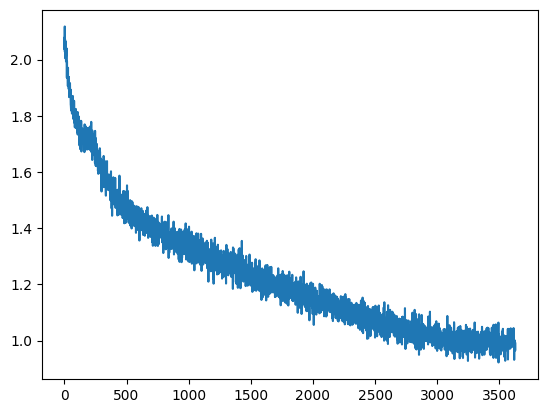

In [ ]:
plt.plot(losses)
plt.show()

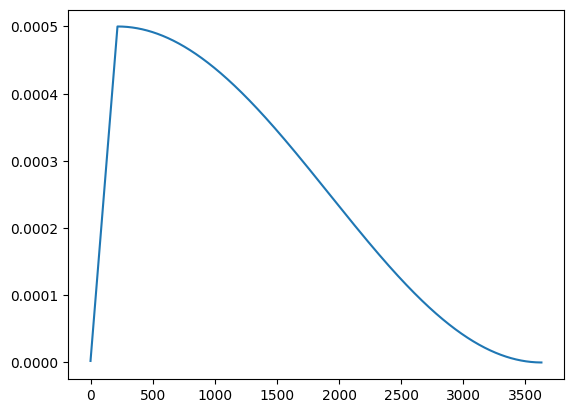

In [ ]:
plt.plot(learning_rates)

In [ ]:
trained_model = AutoModelForCausalLM.from_pretrained(f"{args.output_dir}-trained/checkpoint-36300")

In [ ]:
code_prmpt = """\
# create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create scatter plot with x, y with size 20
"""

print(complete_prompt(code_prmpt, trained_model, tokenizer))

</s># create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create scatter plot with x, y with size 20
fig = plt.figure(figsize=(20,10))

# plot scatter
ax = fig.add_subplot(111)

# scatter plot with x and y
fig.scatter(x, y, marker='o', c='b


### Interactive Demo

In [22]:
! pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl si

In [24]:
from transformers import AutoModelForCausalLM, AutoTokenizer

checkpoint = "facebook/opt-125m"

tokenizer = AutoTokenizer.from_pretrained(checkpoint, use_fast=True)
model = AutoModelForCausalLM.from_pretrained(checkpoint)

In [25]:
import gradio as gr

def predict(prompt):
    return complete_prompt(prompt, model, tokenizer)

gr.close_all()
gr.Interface(fn=predict, inputs="text", outputs="text").launch(server_port=7860)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4c1614e6e6eb9669f0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Inference with LLaMa 30B

Learn more about [Inference with Large models](https://huggingface.co/docs/accelerate/usage_guides/big_modeling)

In [ ]:
import torch

from accelerate import init_empty_weights, dispatch_model, infer_auto_device_map, load_checkpoint_and_dispatch
from transformers import AutoConfig, AutoModelForCausalLM, AutoTokenizer

In [ ]:
checkpoint = "huggyllama/llama-30b"
config = AutoConfig.from_pretrained(checkpoint, dtype=torch.bfloat16)

# Initializes an empty shell with the model. This is instant and does not use any memory.
with init_empty_weights():
    model = AutoModelForCausalLM.from_config(config)

# Initialize the model under the previous context manager breaks the tied weights.
# So, we need to retie them.
model.tie_weights()

config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

In [ ]:
device_map = infer_auto_device_map(
    model,
    max_memory={0: "14GB", "cpu": "10GB"},
    no_split_module_classes=["LlamaDecoderLayer"],
    dtype='float16',
)

In [ ]:
device_map

OrderedDict([('model.embed_tokens', 0),
             ('model.layers.0', 0),
             ('model.layers.1', 0),
             ('model.layers.2', 0),
             ('model.layers.3', 0),
             ('model.layers.4', 0),
             ('model.layers.5', 0),
             ('model.layers.6', 0),
             ('model.layers.7', 0),
             ('model.layers.8', 0),
             ('model.layers.9', 0),
             ('model.layers.10', 0),
             ('model.layers.11', 'cpu'),
             ('model.layers.12', 'cpu'),
             ('model.layers.13', 'cpu'),
             ('model.layers.14', 'cpu'),
             ('model.layers.15', 'cpu'),
             ('model.layers.16', 'cpu'),
             ('model.layers.17', 'cpu'),
             ('model.layers.18', 'cpu'),
             ('model.layers.19', 'disk'),
             ('model.layers.20', 'disk'),
             ('model.layers.21', 'disk'),
             ('model.layers.22', 'disk'),
             ('model.layers.23', 'disk'),
             ('model.laye

In [ ]:
load_checkpoint_and_dispatch(
    model,
    f"{hf_home}/hub/models--huggyllama-llama-30b/snapshots/f991780f9362b2fcaefad066cd235058844562b7/",
    device_map=device_map,
    dtype='float16',
    offload_folder=f"/Tmp/slurm.3266104.0/offload",
)
model.tie_weights()

In [ ]:
from transformers import LlamaTokenizer

tokenizer = LlamaTokenizer.from_pretrained(checkpoint)

In [ ]:
print(complete_prompt(code_prompt, model, tokenizer))

Output:
```text
 ⁇  # create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create scatter plot with x, y
ax = plt.subplot(111)
ax.scatter(x, y)

# rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=50)
\end{code}
```

In [ ]:
from transformers import set_seed
code_prompt = """\
# create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create scatter plot with x, y with size 20
"""
print(complete_prompt(code_prompt, model, tokenizer))

Output
```text
 ⁇  # create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create scatter plot with x, y with size 20
ax = plt.subplot(111)
ax.scatter(x, y, s=20)

# now fit a regression through the scatterplot
model = sklearn.linear_model.LinearRegression()
```

Deepspeed can be used to finetune/pretrain models of very large sizes. Huggingface trainer already has a integration with Deepspeed:
    
https://huggingface.co/docs/transformers/main/en/main_classes/deepspeed